Kaggle link : https://www.kaggle.com/datasets/sreekargv/bike-rentals
This dataset is regression problem

In [113]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("/users/amulya/Downloads/archive (7)/day.csv")
# print(df.dtypes)
null_values = df.isna().sum()
# print(null_values)
unwanted_columns = ['instant','holiday','dteday','casual','atemp']
df = df.drop(unwanted_columns,axis = 1)
# print(df.to_string())  
# df.rename()
# print(df[df['cnt'] == 8714])
# df['dteday'] = pd.to_datetime(df['dteday'])
# print(df[''].columns)
# print(df.dtypes)
print(df.describe().T)
correlation = df.corr()['cnt']
print(correlation)
# fig,ax = plt.subplots(figsize=(20, 10))
# sns.pointplot(data = df ,x = 'temp', y = 'cnt', hue = 'atemp', ax=ax)
# plt.show()

            count         mean          std        min          25%  \
season      731.0     2.496580     1.110807   1.000000     2.000000   
yr          731.0     0.500684     0.500342   0.000000     0.000000   
mnth        731.0     6.519836     3.451913   1.000000     4.000000   
weekday     731.0     2.997264     2.004787   0.000000     1.000000   
workingday  731.0     0.683995     0.465233   0.000000     0.000000   
weathersit  731.0     1.395349     0.544894   1.000000     1.000000   
temp        731.0     0.495385     0.183051   0.059130     0.337083   
hum         731.0     0.627894     0.142429   0.000000     0.520000   
windspeed   731.0     0.190486     0.077498   0.022392     0.134950   
registered  731.0  3656.172367  1560.256377  20.000000  2497.000000   
cnt         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                    50%          75%          max  
season         3.000000     3.000000     4.000000  
yr             1.000000     1.000000     1.

1. there are no null values
2. I have dropped duplicate columns ('yr','mnth','holiday','casual') we can get casual users by subtracting cnt-registered 

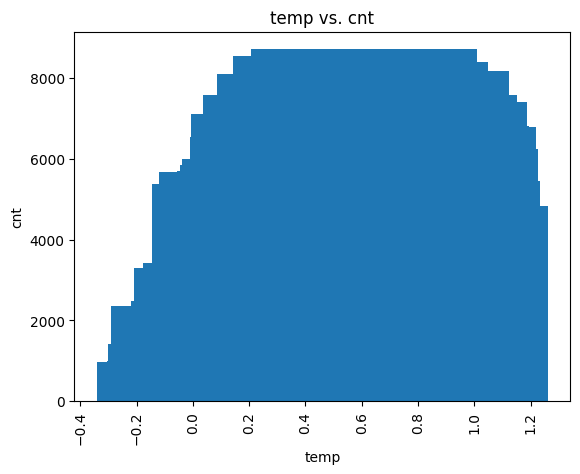

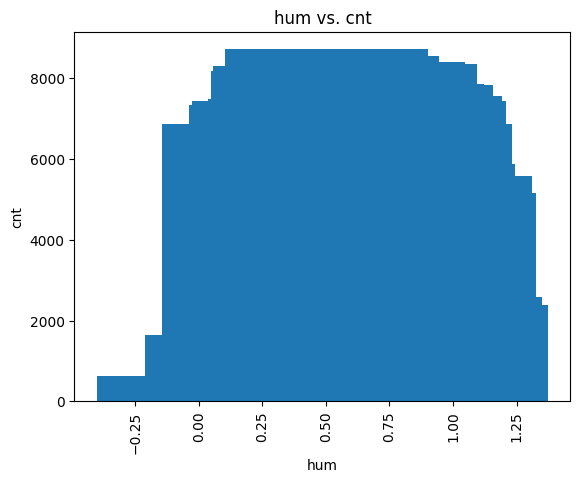

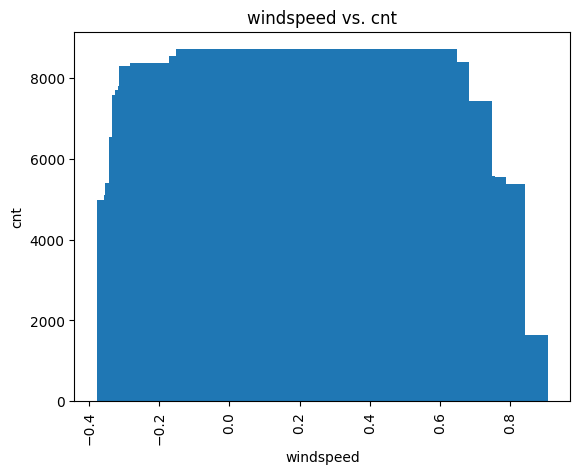

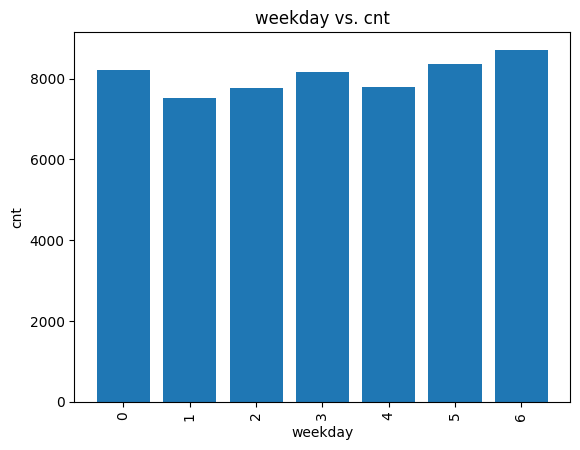

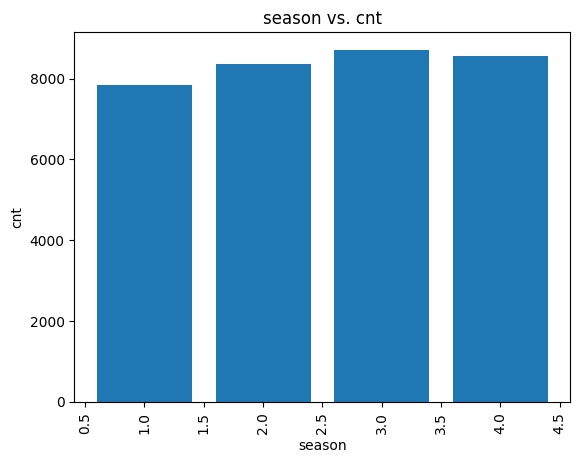

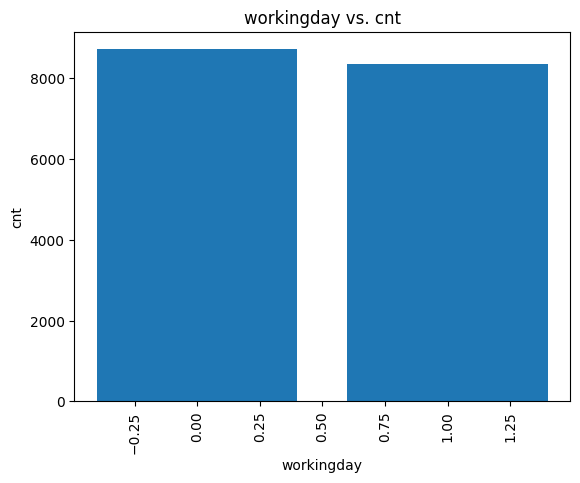

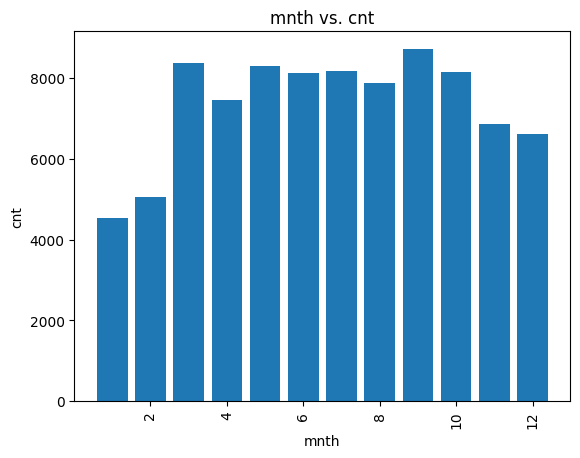

In [3]:
columns = ['temp','hum','windspeed','weekday','season','workingday','mnth']
for i in columns:
    plt.figure()  
    plt.bar(df[i], df['cnt']) 
    plt.xlabel(i)  
    plt.ylabel('cnt')  
    plt.title(f'{i} vs. cnt') 
    plt.xticks(rotation=90)
    
    plt.show() 

1. as temp increases we can see no of bike rentals also increses, same goes for humidity,atemp,windspeed
2. in the year of 2012 bike rentals increases
3. weekday and working day is not effecting much on output column as we can see equal distribution 
4. in fall season there are more bike rentals

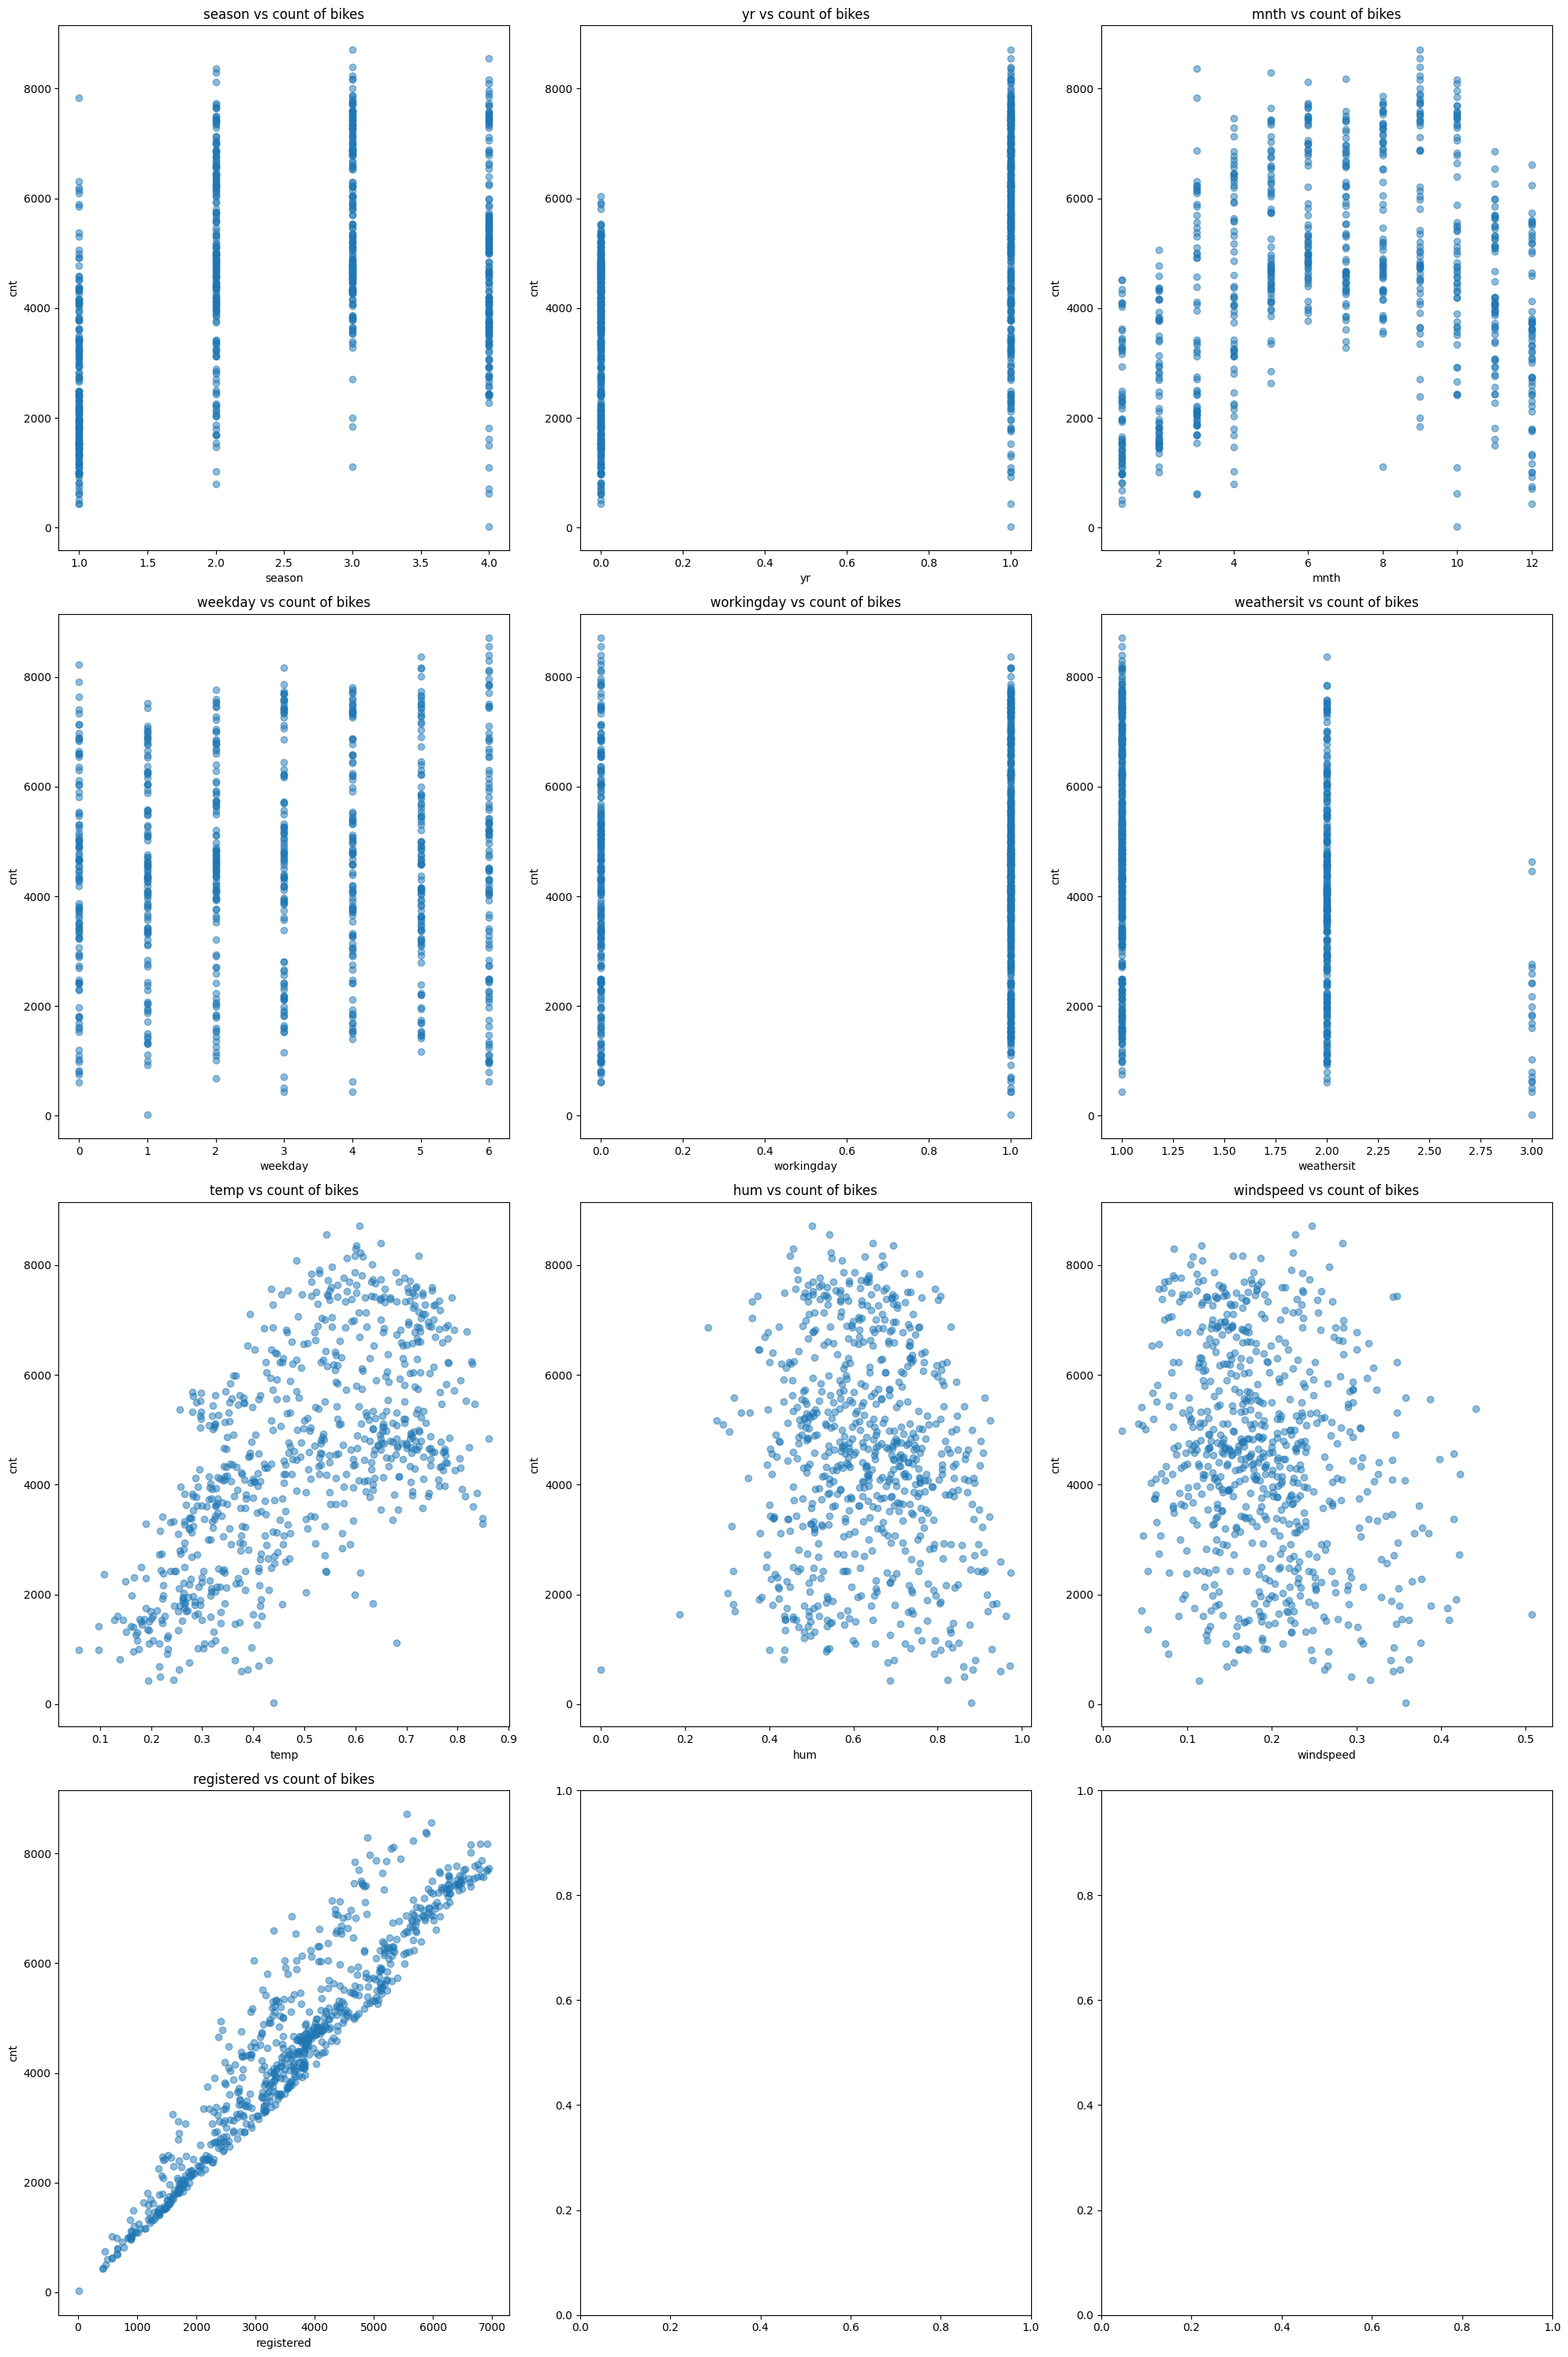

In [4]:
input_columns = df.drop('cnt', axis=1).columns
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()
for i, column in enumerate(input_columns):
    ax = axes[i]
    ax.scatter(df[column], df['cnt'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('cnt')
    ax.set_title(f'{column} vs count of bikes')

plt.tight_layout()
plt.show()

In [5]:
# print(df.columns)
dummies = pd.get_dummies(df['season'])
# df = df.drop('season',axis = 1)
df = pd.concat([df, dummies], axis=1)
df.rename(columns={1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter' }, inplace=True)
weekDay_dummies = pd.get_dummies(df['weekday'],prefix = 'weekday')
df = pd.concat([df,weekDay_dummies],axis = 1)
weather_dummies = pd.get_dummies(df['weathersit'],prefix = 'weather')
df = pd.concat([df,weather_dummies],axis=1)
month_dummies = pd.get_dummies(df['mnth'],prefix = 'month')
df = pd.concat([df,month_dummies],axis=1)
print(df.head())

   season  yr  mnth  weekday  workingday  weathersit      temp       hum  \
0       1   0     1        6           0           2  0.344167  0.805833   
1       1   0     1        0           0           2  0.363478  0.696087   
2       1   0     1        1           1           1  0.196364  0.437273   
3       1   0     1        2           1           1  0.200000  0.590435   
4       1   0     1        3           1           1  0.226957  0.436957   

   windspeed  registered  ...  month_3  month_4  month_5  month_6  month_7  \
0   0.160446         654  ...    False    False    False    False    False   
1   0.248539         670  ...    False    False    False    False    False   
2   0.248309        1229  ...    False    False    False    False    False   
3   0.160296        1454  ...    False    False    False    False    False   
4   0.186900        1518  ...    False    False    False    False    False   

   month_8  month_9  month_10  month_11  month_12  
0    False    False   

In [6]:
removedColumns=['season','weekday','weathersit','mnth']
df = df.drop(removedColumns,axis =1)
# print(df.head())
  


In [7]:
y = df['cnt']
x = df.drop('cnt', axis = 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha= 0.9, fit_intercept= True, max_iter= 1000)
lasso.fit(x_train, y_train)
a = lasso.score(x_test,y_test)
x_pred_lasso_test = lasso.predict(x_test)
# x_pred_lasso_test1= np.log(x_pred_lasso_test)
# print(x_pred_lasso_test1)
r2_score(y_test, x_pred_lasso_test)
mse = mean_squared_error(y_test, x_pred_lasso_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
mae = mean_absolute_error(y_test, x_pred_lasso_test)
r_squared = r2_score(y_test, x_pred_lasso_test)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)  
df['predicted_output'] = lasso.predict(X_scaled)
# print(df[['cnt','predicted_output']])
# a = df['cnt']
# b= df['predicted_output']
# c = a-b
# df['residuals'] = c
# print(df[['cnt','predicted_output','residuals']])
# print(c)
# plt.bar(a, c)
# plt.xlabel('Actual Values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.axhline(y=0, color='r', linestyle='-')
# plt.show()
# c.describe()


Root Mean Squared Error (RMSE): 309.6785277110451
Mean Absolute Error (MAE): 229.71758961820305
Mean Squared Error (MSE): 95900.79052528052
R-squared (R²): 0.9758980627950031


      cnt  predicted_output    residuals
0     985       1344.313065  -359.313065
1     801       1226.667616  -425.667616
2    1349        950.785429   398.214571
3    1562       1160.709968   401.290032
4    1600       1272.084109   327.915891
5    1606       1330.878651   275.121349
6    1510       1159.174606   350.825394
7     959       1380.277944  -421.277944
8     822       1139.510636  -317.510636
9    1321        954.905461   366.094539
10   1263        753.556772   509.443228
11   1162        626.884368   535.115632
12   1406        958.394654   447.605346
13   1421       1241.656335   179.343665
14   1248       1719.131253  -471.131253
15   1204       1591.412776  -387.412776
16   1000       1104.652028  -104.652028
17    683        122.998387   560.001613
18   1650       1204.239072   445.760928
19   1927       1582.602981   344.397019
20   1543       1224.445526   318.554474
21    981       1458.294353  -477.294353
22    986       1252.222388  -266.222388
23   1416       

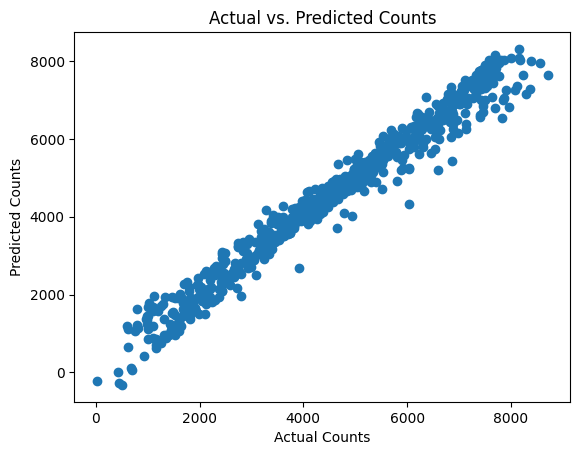

In [277]:
a = df['cnt']
b= df['predicted_output']
c = a-b
df['residuals'] = c
print(df[['cnt','predicted_output','residuals']])
# print(c)
# plt.bar(a, c)
# plt.xlabel('Actual Values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.axhline(y=0, color='r', linestyle='-')
# plt.show()
c.describe()
plt.scatter(df['cnt'], df['predicted_output'])
plt.xlabel('Actual Counts')
plt.ylabel('Predicted Counts')
plt.title('Actual vs. Predicted Counts')
plt.show()



In [22]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
a = df['cnt']
b= df['predicted_output']
c = a-b
df['residuals'] = c
df = df[df['residuals']<=150]
# print(df)
print(df.columns)
df_filtered = df[(df['residuals'] >= -150) & (df['residuals'] <= 150)]
# print(df_filtered.describe())
print(df['cnt'].median())
print(df['cnt'].mean())
columns = ['yr','workingday','spring','summer', 'fall', 'winter', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_1', 'weather_2', 'weather_3', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12']
for i in columns:
    print(df_filtered[i].value_counts())
    # print()
# Print the relevant columns from the filtered dataset
print(df_filtered[['cnt', 'predicted_output', 'residuals']])
# print(df[['cnt','predicted_output','residuals']])

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'registered', 'cnt',
       'spring', 'summer', 'fall', 'winter', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_1', 'weather_2', 'weather_3', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'predicted_output', 'residuals'],
      dtype='object')
4553.0
4560.926605504587
yr
0    182
1    141
Name: count, dtype: int64
workingday
1    277
0     46
Name: count, dtype: int64
spring
False    273
True      50
Name: count, dtype: int64
summer
False    243
True      80
Name: count, dtype: int64
fall
False    223
True     100
Name: count, dtype: int64
winter
False    230
True      93
Name: count, dtype: int64
weekday_0
False    303
True      20
Name: count, dtype: int64
weekday_1
False    261
True      62
Name: count, dtype: int64
weekday_2
False    266
True      57
Name: cou

I have applied range for error -> -150 to 150
i got 323 entries where my model is working good
model is working fine on working days, fall season, weathersit is 1(Clear, Few clouds, Partly cloudy, Partly cloudy), count values around 4553.0

In [276]:
param_grid = { 'fit_intercept': [True],'alpha': [0.1,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.001,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 'max_iter':[10,20,50,100,200,300,500,1000,900]}

# Initialize GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best estimator from GridSearchCV
best_lasso = grid_search.best_estimator_
grid_search.best_params_

/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.944e+07, tolerance: 1.497e+05
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.133e+07, tolerance: 1.475e+05
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/anaconda3/envs/amulya_base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

{'alpha': 0.9, 'fit_intercept': True, 'max_iter': 20}

220


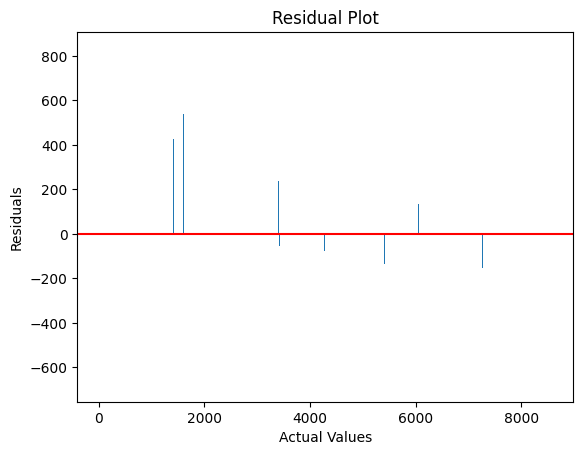

count    220.000000
mean      19.008455
std      309.799487
min     -678.573094
25%     -156.503847
50%       -4.941424
75%      140.387034
max      831.535547
Name: cnt, dtype: float64

In [239]:
residuals = y_test - x_pred_lasso_test
print(residuals.count())
plt.bar(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
residuals.describe()

In [240]:
y = df['cnt']
x = df.drop('cnt', axis = 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha= 0.9, fit_intercept= True, max_iter= 1000)
ridge.fit(x_train, y_train)
a = ridge.score(x_test,y_test)
x_pred_lasso_test = ridge.predict(x_test)
r2_score(y_test, x_pred_lasso_test)
mse = mean_squared_error(y_test, x_pred_lasso_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
mae = mean_absolute_error(y_test, x_pred_lasso_test)
r_squared = r2_score(y_test, x_pred_lasso_test)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)  
df['predicted_output'] = ridge.predict(X_scaled)
print(df[['cnt','predicted_output']])

Root Mean Squared Error (RMSE): 319.33987467359117
Mean Absolute Error (MAE): 236.45713667290443
Mean Squared Error (MSE): 101977.95555654493
R-squared (R²): 0.9743707401403549
      cnt  predicted_output
0     985       1335.554432
1     801       1185.511415
2    1349        989.416193
3    1562       1173.440253
4    1600       1308.537904
5    1606       1371.409815
6    1510       1157.433921
7     959       1300.462758
8     822       1070.412534
9    1321        974.563591
10   1263        738.096703
11   1162        648.564223
12   1406        966.262322
13   1421       1276.345206
14   1248       1670.412072
15   1204       1558.699811
16   1000        971.823471
17    683        158.969270
18   1650       1172.199794
19   1927       1535.522150
20   1543       1214.708875
21    981       1425.686360
22    986       1186.735371
23   1416       1001.265293
24   1985       1436.231953
25    506       -425.315161
26    431        138.164988
27   1167        851.940314
28   1098  

In [241]:
df1 = pd.read_csv("/users/amulya/Downloads/archive (7)/hour.csv")
print(df1['dteday'].value_counts())

dteday
2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
2012-05-01    24
2012-05-02    24
2012-05-03    24
2012-05-04    24
2012-05-05    24
2012-05-06    24
2012-05-07    24
2012-05-08    24
2012-05-09    24
2012-05-10    24
2012-05-11    24
2012-05-12    24
2012-05-13    24
2012-05-14    24
2012-05-15    24
2012-05-16    24
2012-04-27    24
2012-04-26    24
2012-04-25    24
2012-04-14    24
2012-04-05    24
2012-04-06    24
2012-04-07    24
2012-04-08    24
2012-04-09    24
2012-04-10    24
2012-04-12    24
2012-04-13    24
2012-04-15    24
2012-04-24    24
2012-04-16    24
2012-04-17    24
2012-04-18    24
2012-04-19    24
2012-04-20    24
2012-04-21    24
2012-04-22    24
2012-04-23    24
2012-05-17    24
2012-05-18    24
2012-05-19    24
2012-06-20    24
2012-06-12    24
2012-06-13    24
2012-06-14    24
2012-06-15    24
2012-06-16    24
2012-06-17    24
2012-06-18    24
2012-06-19    24
2012-06-21    24
2012-06-10    24
2012-06-22    24
2012-06